In [69]:
## If something goes wrong, don't move files to recycle bin and delete them. It might take ages
## Use these commands in cmd

# del /f/s/q foldername > nul
# /s/q foldername

In [ ]:
!pip install idx2numpy

In [1]:
import idx2numpy
import numpy as np
import cv2
import os

TRAIN_IMG_PATH = 'emnist-digits-train-images-idx3-ubyte'
TRAIN_LABELS_PATH = 'emnist-digits-train-labels-idx1-ubyte'

TEST_IMG_PATH = 'emnist-digits-test-images-idx3-ubyte'
TEST_LABELS_PATH = 'emnist-digits-test-labels-idx1-ubyte'

In [2]:
def create_folder(name, dir=''):

    # Creates a single folder
    # By default, does so in current directory
    # But param "dir" provides optional placement



    path = os.path.join(dir,name)
    try:
        os.makedirs(path)
        print("Created folder %s"%path)
    except(FileExistsError):
        print("Folder '%s' already exists"%path)

def create_class_folders(labels, dir=''): 

    # Creates a folder for each unique class found in labels
    # By default, does so in current directory
    # But param "dir" provides optional placement

    # Example input:
    # labels = ndarray([apple ball crow])
    # dir = "imgs"
    #
    # Example result:
    # Directories "imgs/apple", "imgs/ball", "imgs/crow"



    dir = str(dir)
    labels = np.array(labels,dtype=str)

    for label in np.unique(labels):
        create_folder(label,dir)

def write_images_to_folders(images, labels, dir='', verbose=False):

    # Writes image to a folder matching its label
    # Param "dir" provides optional placement
    # To track progress, set param "verbose" to True
    # (But it will slow down the process...)



    dir = str(dir)
    labels = np.array(labels,dtype=str)

    # Iterate trough images and according labels
    for i in range(len(images)):
        img = images[i]
        label = labels[i]

        # Rotate, flip and invert colors
        img = process_img_emnist(img)

        # Place each image in a folder according to its class
        path = os.path.join(dir,label,str(i)+".jpg")
        cv2.imwrite(path, img)

        if verbose:
            print("Succesfully written image %s                   "%path, end='\r')

    print("Succesfully written ALL images")

def process_img_emnist(img):
    # Rotates, flips and inverts colors of emnist image

    img = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
    img = cv2.flip(img,1)
    img = 255-img
    
    return img

In [3]:
# Load TRAIN images and labels, convert them to numpy arrays

train_images = idx2numpy.convert_from_file(TRAIN_IMG_PATH)
train_labels = idx2numpy.convert_from_file(TRAIN_LABELS_PATH)

# Labels are int, but str is needed.
train_labels = np.array(train_labels, dtype=str)

# Create class folders and populate them with fresh images
create_class_folders(train_labels, 'train')
write_images_to_folders(train_images, train_labels, 'train')


Created folder train\0
Created folder train\1
Created folder train\2
Created folder train\3
Created folder train\4
Created folder train\5
Created folder train\6
Created folder train\7
Created folder train\8
Created folder train\9
Succesfully written ALL images


In [4]:
# Do the same with TEST images

test_images = idx2numpy.convert_from_file(TEST_IMG_PATH)
test_labels = idx2numpy.convert_from_file(TEST_LABELS_PATH)

# Labels are int, but str is needed.
test_labels = np.array(test_labels, dtype=str)

# Create class folders and populate them with fresh images
create_class_folders(test_labels, 'test')
write_images_to_folders(test_images, test_labels, 'test')

Created folder test\0
Created folder test\1
Created folder test\2
Created folder test\3
Created folder test\4
Created folder test\5
Created folder test\6
Created folder test\7
Created folder test\8
Created folder test\9
Succesfully written ALL images


In [ ]:
########################################################################################################################
######## ALL IMAGES ARE WRITTEN, AND NOW IT'S TIME TO MANUALLY PICK AND CHOOSE WHAT IS NECESSARY FOR THE TASK ##########
########################################################################################################################

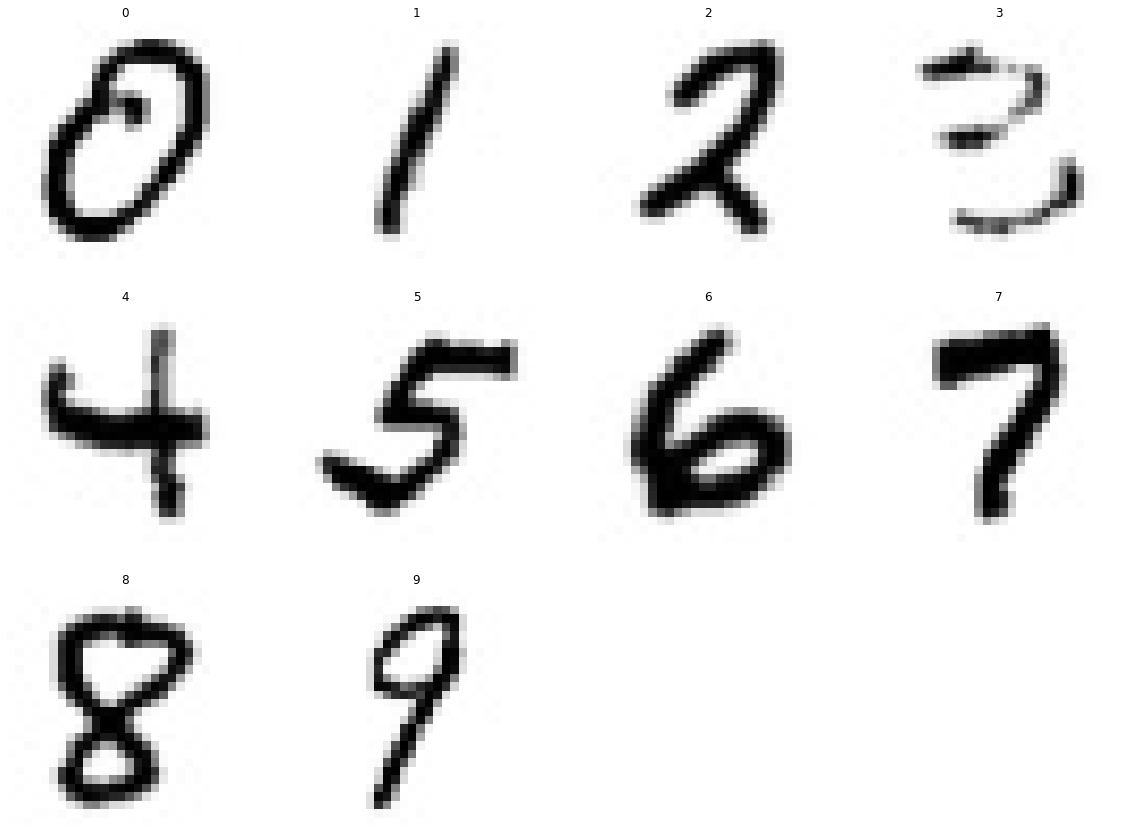

In [5]:
import matplotlib.pyplot as plt

def get_class_samples(dir=''):
    # Returns an array consisting of single samples and according label
    # Taken from each subfolder in the parent "dir"

    images = []
    labels = []

    folders = os.listdir(dir)
    for folder in folders:
        path = os.path.join(dir,folder)

        # To avoid listing all files in subfolders with listdir
        # os.walk function can be used
        walk = os.walk(path)
        filename = next(walk)[2][0]
        image_path = os.path.join(dir,folder,filename)
        
        images.append(cv2.imread(image_path))
        labels.append(folder)

    return images, labels




# Visualize an example from each category for a simple inspection
sample_imgs, sample_labels = get_class_samples('test')

plt.figure(figsize=(20, 20))
grid_size = int(len(sample_labels)**0.5)+1
for i in range(len(sample_labels)):
    ax = plt.subplot(grid_size, grid_size, i+1)
    plt.imshow(sample_imgs[i].astype("uint8"),cmap='gray')
    plt.title(sample_labels[i])
    plt.axis("off")